# Первая лабораторная работа по ML

| Студент | Суханов Е.А. |
|---------|--------|
| Группа  | М8О-406Б-19      |

Загрузим датасет

In [16]:
import pandas as pd
import numpy as np

ds = pd.read_csv("ds.csv")
ds.head()

,AgeCategory,GenHealth,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseOrStroke,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,Diabetic_No,Diabetic_Yes
0,8,1,16.60,3.0,30.0,5.0,0.0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
1,13,1,20.34,0.0,0.0,7.0,1.0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
2,10,-1,26.58,20.0,30.0,8.0,0.0,0,1,1,...,0,1,0,1,1,0,1,0,0,1
3,12,0,24.21,0.0,0.0,6.0,0.0,1,0,1,...,1,0,1,0,1,0,0,1,1,0
4,5,1,23.71,28.0,0.0,8.0,0.0,1,0,1,...,0,1,1,0,1,0,1,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
X = ds.drop("HeartDiseaseOrStroke", axis=1).to_numpy()
Y = ds["HeartDiseaseOrStroke"].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [18]:
# Мой датасет имеет особенность: отношение "yes" к "no" в целевом свойстве очень мало.
# Поэтому я решил написать "балансер", который балансирует это отношение.
# (делает его равным factor)
def balance(x,y, factor=0.5, shuffle=True):
    x_true = x[y > 0.5]
    y_true = y[y > 0.5]
    x_false = x[y < 0.5]
    y_false = y[y < 0.5]
    m = len(x_false)
    n = min(len(x_true), int(m*factor))
    m = min(m, int(n/factor))
    x_res = np.vstack([x_true[:n], x_false[:m]])
    y_res = np.hstack([y_true[:n], y_false[:m]])
    def unison_shuffled_copies(a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    if shuffle:
        x_res, y_res = unison_shuffled_copies(x_res, y_res)
    return x_res, y_res

x_train_balanced, y_train_balanced = balance(x_train, y_train, factor=1)
print(x_train_balanced.shape, y_train_balanced.shape)
x_test_balanced, y_test_balanced = balance(x_test, y_test, factor=1)
print(x_test_balanced.shape, y_test_balanced.shape)

(52332, 24) (52332,)
(17774, 24) (17774,)


In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# Построим матрицу неточности
def plot_confusion_matrix(y, pred, name):
    cm = confusion_matrix(y, pred)
    # cm = cm / cm.sum() # normolize
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax,)
    plt.show()

def metrics(y, pred):
    print("Accuracy:", accuracy_score(y, pred))
    print("Recall:", recall_score(y, pred))
    print("Precision:", precision_score(y, pred))

# Создаим фунцию для подсчета и вывода различных метрик и пр.
def info(y, pred, sk_pred):
    print("Accuracy:", accuracy_score(y, pred))
    print("Accuracy sklearn model:", accuracy_score(y, sk_pred))
    print("Recall:", recall_score(y, pred))
    print("Recall sklearn model:", recall_score(y, sk_pred))
    print("Precision:", precision_score(y, pred))
    print("Precision sklearn model:", precision_score(y, sk_pred))
    plot_confusion_matrix(y, pred, "My model")
    plot_confusion_matrix(y, sk_pred, "sklearnModel")

### Linear Regression

In [126]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [127]:
class LinearRegression(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
        
    def predict(self, X):
        pred = X @ self.w
        return pred
    
    def get_weights(self):
        return self.w

In [128]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(min(pred), max(pred))
my_pred = np.where(pred > 0, 1.0, 0.0)

-0.5724184677676623 1.95703125


In [129]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(min(pred), max(pred))
sk_pred = np.where(pred > 0, 1.0, 0.0)

-0.16025495067185191 0.6908417677823342


Accuracy: 0.19611252173260454
Accuracy sklearn model: 0.2878835257476641
Recall: 0.9929109935861371
Recall sklearn model: 0.9869472262855857
Precision: 0.12082540291109255
Precision sklearn model: 0.1337287308654022


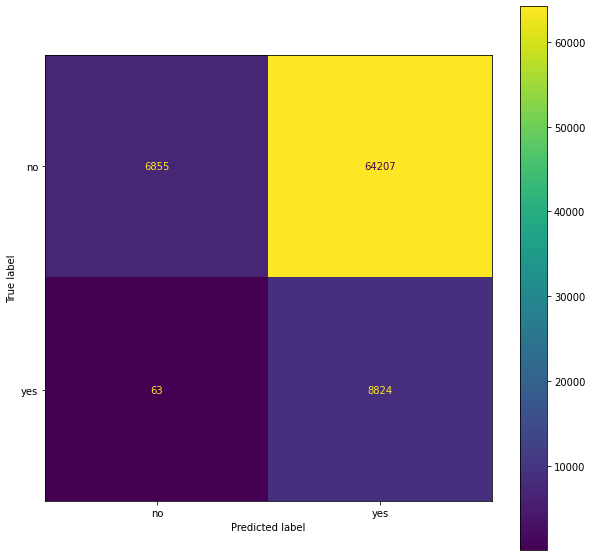

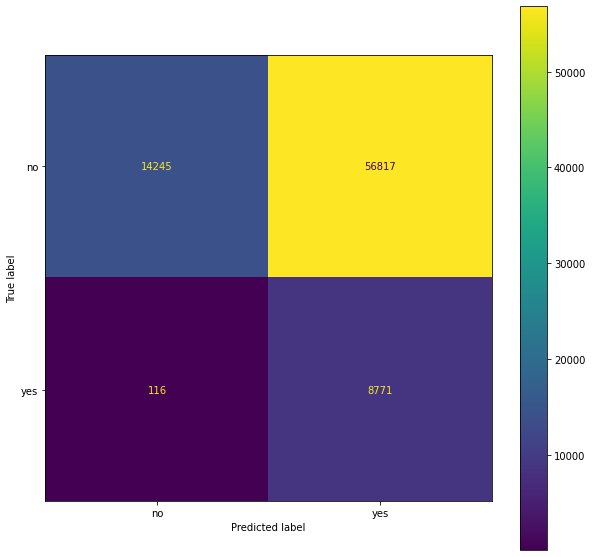

In [130]:
info(y_test, my_pred, sk_pred)

Линейная регрессия плохо подходит для классификации. Так как результат предсказания модели нужно пропустить через функцию, которая будет давать окончательный ответ.

Несмотря на низкую точность, можно заметить, что моя модель имеет высокий recall. Это означает, что когда человек действительно болен ССЗ (сердечно-сосудистым заболеванием), то модель это с высокой вероятностью обнаруживает. 
|
Однако у моделей много ложных срабатываний, о чем нам говорит precision.

Тем не менее, в нашей задаче важно иметь высокий recall


### Logistic Regression

In [135]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr = 0.05, max_iters = 100):
        self.lr = lr
        self.max_iters = max_iters

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        for i in range(self.max_iters):
            self.update(X, Y)
        return self

    def get_params(self, deep = True):
        return {"lr": self.lr, "max_iters" : self.max_iters}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def update(self, X, Y):
        z = X.dot(self.w)
        a = 1 / (1 + np.exp(-z))
        grad = (a - Y.T)
        grad = np.reshape(grad, self.m)
        dW = np.dot(X.T, grad) / self.m
        db = np.sum(grad) / self.m
        self.w = self.w - self.lr * dW

        return self

    def predict(self, X) :
        z = X.dot(self.w)
        pred = 1 / ( 1 + np.exp(-z))
        return np.where(pred > 0.5, 1.0, 0.0)

In [136]:
model = LogisticRegression(max_iters=10)
model.fit(x_train, y_train)
my_pred = model.predict(x_test)
print(accuracy_score(y_test, my_pred))

0.8827627612603034


In [137]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
sk_pred = model.predict(x_test)
print(min(sk_pred), max(sk_pred))
print(accuracy_score(y_test, sk_pred))

0.0 1.0
0.8901174498742949


Accuracy: 0.8827627612603034
Accuracy sklearn model: 0.8901174498742949
Recall: 0.0520985709463261
Recall sklearn model: 0.11893777427703386
Precision: 0.32790368271954673
Precision sklearn model: 0.5253479125248509


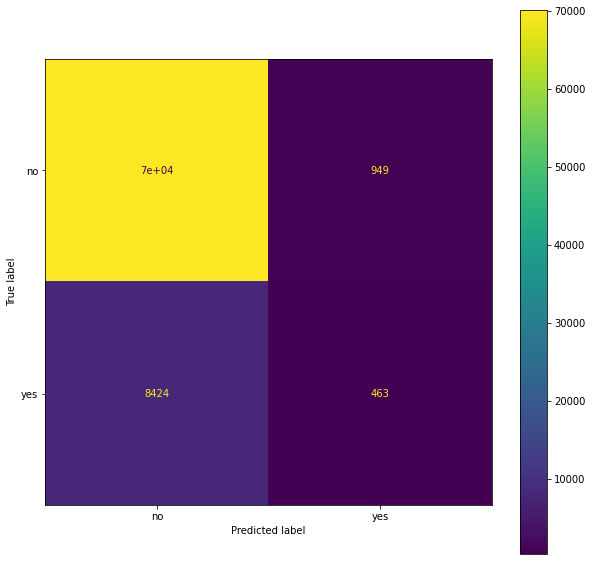

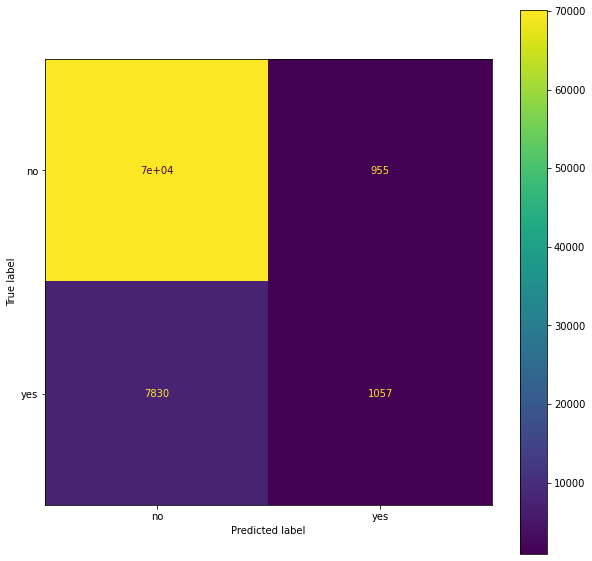

In [138]:
info(y_test, my_pred, sk_pred)

Логистическая регрессия больше подходит для классификации, так как она выдает значения в пределах четких границ, которые просто интерпретировать.

У моделей высокий Accuracy, но это не означает, что они хорошо работают. У них очень много False-Positive срабатываний. О чем нам говорит Recall.

Поэтому такую модель нельзя использовать в нашем случае.


### SVM

In [139]:
class SVM(ClassifierMixin, BaseEstimator):

    def __init__(self, lr=0.001, alpha=0.01, n_iters=1000):
        self.lr = lr
        self.alpha = alpha
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def get_params(self, deep = True):
        return {"lr": self.lr, "n_iters" : self.n_iters, "alpha": self.alpha}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, Y):
        n, m = X.shape
        
        y_ = np.where(Y < 0.5, -1, 1)
        
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.alpha * self.w)
                else:
                    self.w -= self.lr * (2 * self.alpha * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return (np.sign(approx) + 1) / 2

In [140]:
model = SVM(n_iters=10)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(min(pred), max(pred))
print(accuracy_score(y_test, my_pred))

0.0 1.0
0.8827627612603034


In [141]:
from sklearn import svm
model = svm.SVC(max_iter=1000, kernel="linear")
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(min(pred), max(pred))
sk_pred = np.where(pred > 0.5, 1.0, 0.0)
print(accuracy_score(y_test, sk_pred))

d:\python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.0 1.0
0.8293537129920324


Accuracy: 0.8827627612603034
Accuracy sklearn model: 0.8293537129920324
Recall: 0.0520985709463261
Recall sklearn model: 0.23517497468211995
Precision: 0.32790368271954673
Precision sklearn model: 0.2338854073410922


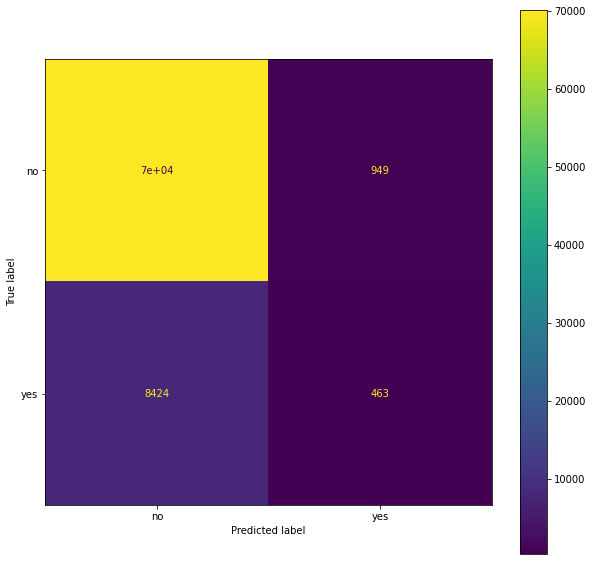

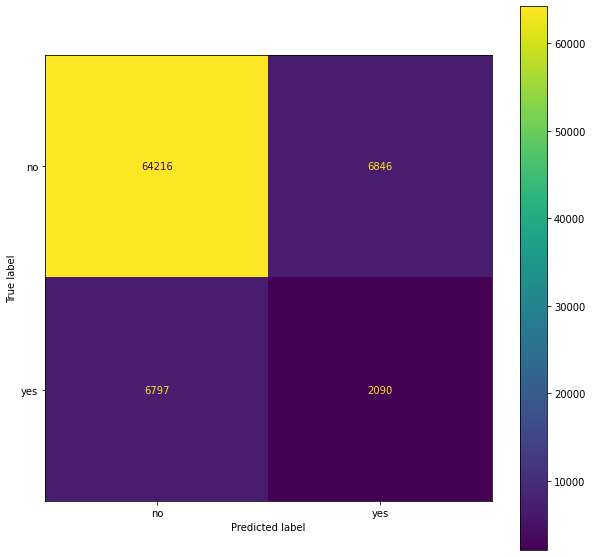

In [142]:
info(y_test, my_pred, sk_pred)

SVN дает лучший результат, чем логистическая регрессия. Тем не менее, recall все равно низкий.

### KNN

In [143]:
from sklearn.metrics import euclidean_distances
class KNN(ClassifierMixin, BaseEstimator):
    def __init__(self, nb):
        self.nb = nb

    def fit(self, X, Y):
        self.X_ = X
        self.y_ = Y
        self.classes = np.unique(Y)
    
    def get_params(self, deep = True):
        return {"nb": self.nb}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def predict(self, X):
        y = np.ndarray((X.shape[0],))
        for i, elem in enumerate(X):
            distances = euclidean_distances([elem], self.X_)[0]
            neighbors = np.argpartition(distances, kth = self.nb - 1)
            k_neighbors = neighbors[:self.nb]
            labels, cnts = np.unique(self.y_[k_neighbors], return_counts = True)
            y[i] = labels[cnts.argmax()]
        return y


In [144]:
model = KNN(nb=5)
model.fit(x_train, y_train)
my_pred = model.predict(x_test)
print(accuracy_score(y_test, my_pred))

0.8788727813981413


In [145]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
sk_pred = model.predict(x_test)
print(accuracy_score(y_test, sk_pred))

0.878860273424308


Accuracy: 0.8788727813981413
Accuracy sklearn model: 0.878860273424308
Recall: 0.12861483065151344
Recall sklearn model: 0.1281647350061888
Precision: 0.37074278300356794
Precision sklearn model: 0.37028608582574774


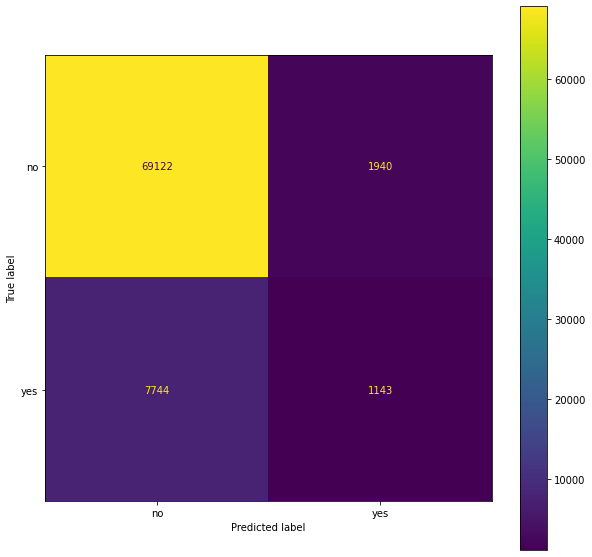

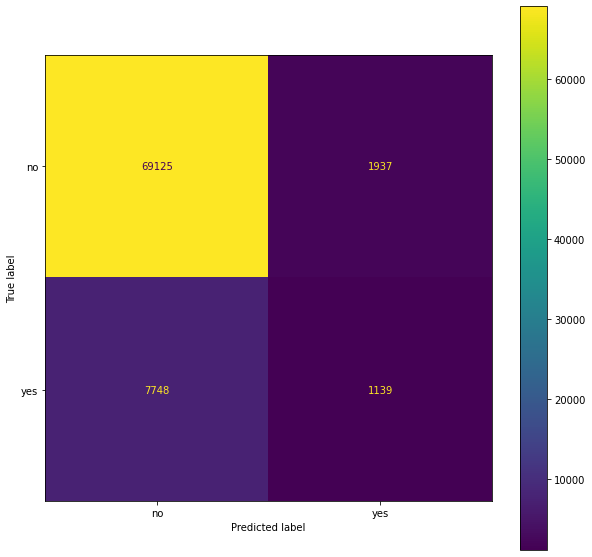

In [146]:
info(y_test, my_pred, sk_pred)

### Naive Bayes

In [147]:
import math
class NaiveBayes(ClassifierMixin, BaseEstimator):
    def __init__(self):
       pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        labels, counts = np.unique(self.y, return_counts = True)
        self.labels = labels
        self.freq = np.array([i / self.y.shape[0] for i in counts])
        self.means = np.array([self.X[self.y == i].mean(axis = 0) for i in labels])
        self.stds = np.array([self.X[self.y == i].std(axis = 0) for i in labels])
        return self

    def gaussian(self, mu, sigma, x0):
        return np.exp(-(x0 - mu) ** 2 / (2 * sigma)) / np.sqrt(2.0 * math.pi * sigma)

    def predict(self, X):        
        res = np.zeros(X.shape[0])
        for i, x_i  in enumerate(X):
            freq = np.array(self.freq)
            for j, label_j in enumerate(self.labels):
                p_x_cond_y = np.array([self.gaussian(self.means[j][k], self.stds[j][k], x_i[k]) for k in range(X.shape[1])])
                freq[j] *= np.prod(p_x_cond_y)
            res[i] = np.argmax(freq)
        return res

In [148]:
model = NaiveBayes()
model.fit(x_train, y_train)
my_pred = model.predict(x_test)
print(accuracy_score(y_test, my_pred))

0.8145067480518831


In [149]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
sk_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, sk_pred))

Accuracy: 0.8087405721147232


Accuracy: 0.8145067480518831
Accuracy sklearn model: 0.8087405721147232
Recall: 0.42826600652638686
Recall sklearn model: 0.5182851355913132
Precision: 0.2807819992622648
Precision sklearn model: 0.29495389344262296


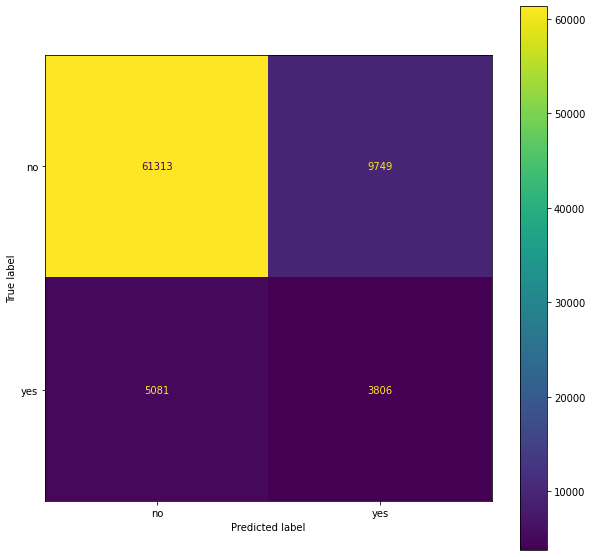

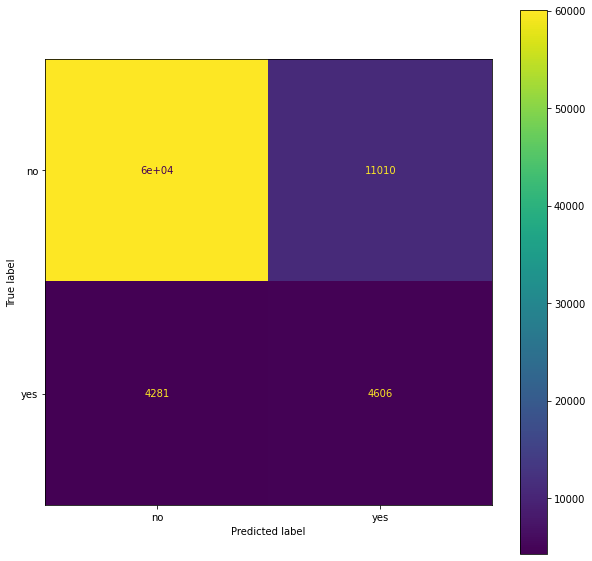

In [150]:
info(y_test, my_pred, sk_pred)

Naive Bayes дает неплохой результат.

## Подбор параметров

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

### Linear Regression

In [155]:
model = GridSearchCV(Pipeline([("Linear", linear_model.LinearRegression())]),
                   {"Linear__fit_intercept" : [True, False]})
model.fit(x_train, y_train)
my_pred = model.best_estimator_.predict(x_test)
my_pred = np.where(my_pred > 0, 1.0, 0.0)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'Linear__fit_intercept': True}
Лучший счёт модели: 0.15086807692354212


In [156]:
with open('LinReg.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.2878835257476641
Recall: 0.1337287308654022
Precision: 0.9869472262855857


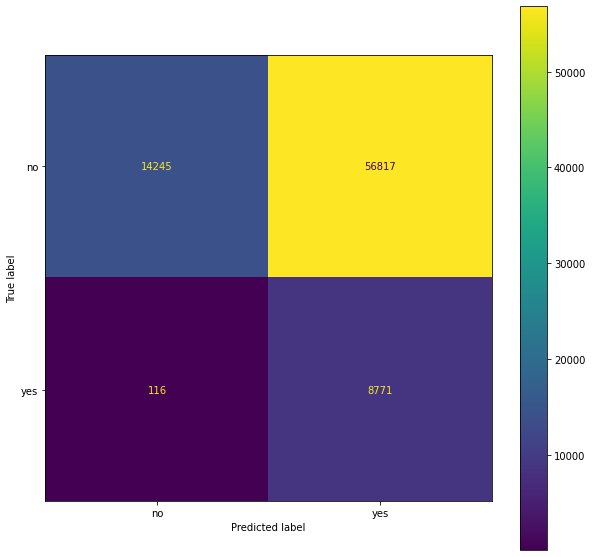

In [157]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "lin reg")

### Logistic Regression

In [107]:
model = GridSearchCV(Pipeline([("LogReg", LogisticRegression())]),
                   {"LogReg__lr" : [0.05, 0.01, 0.005],
                    "LogReg__max_iters" : [100, 200, 500, 2000]})
model.fit(x_train, y_train)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'LogReg__lr': 0.01, 'LogReg__max_iters': 2000}
Лучший счёт модели: 0.8922433552768794


In [108]:
with open('LogReg.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.88851642922363
Recall: 0.4920245398773006
Precision: 0.09024417688758861


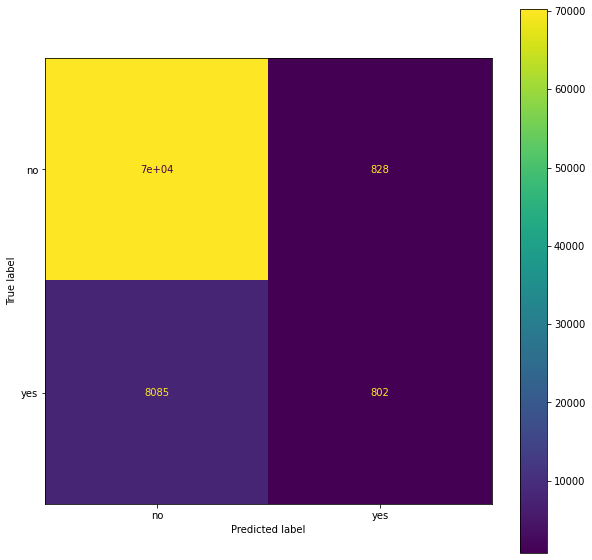

In [109]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "log reg")

### SVM

In [104]:
model = GridSearchCV(Pipeline([("SVM", SVM())]),
                   {"SVM__n_iters" : [20],
                    "SVM__lr" : [0.01, 0.001],
                    "SVM__alpha" : [0.01, 0.005]})
model.fit(x_train, y_train)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'SVM__alpha': 0.01, 'SVM__lr': 0.01, 'SVM__n_iters': 20}
Лучший счёт модели: 0.8480106281551014


In [105]:
with open('SVM.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.8888041126217964
Recall: 0.36363636363636365
Precision: 0.0004500956453246315


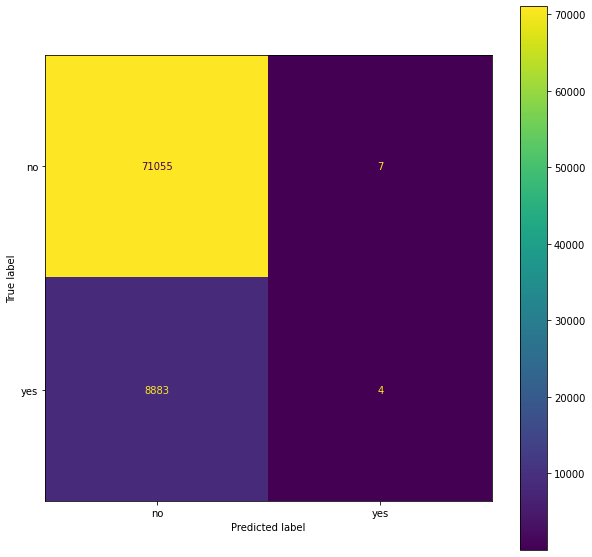

In [106]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "svm")

### KNN

Моя реализация KNN работает довольно долго, поэтому я использую библиотечную реализацию

In [117]:
model = GridSearchCV(Pipeline([("KNN", KNeighborsClassifier())]),
                   {"KNN__n_neighbors" : [9, 7, 5, 3, 1]})
model.fit(x_train, y_train)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'KNN__n_neighbors': 9}
Лучший счёт модели: 0.8866689454297305


In [118]:
with open('KNN.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.8844888616493014
Recall: 0.41030927835051545
Precision: 0.08956903341960167


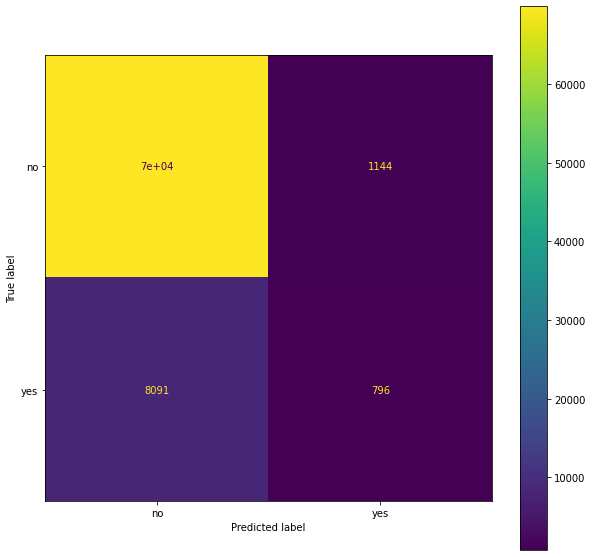

In [119]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "knn")

### Naive Bayes

In [101]:
model = GridSearchCV(Pipeline([("NaiveBayes", NaiveBayes())]), {})
model.fit(x_train, y_train)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {}
Лучший счёт модели: 0.8173578217705598


In [102]:
with open('NaiveBayes.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.8145067480518831
Recall: 0.2807819992622648
Precision: 0.42826600652638686


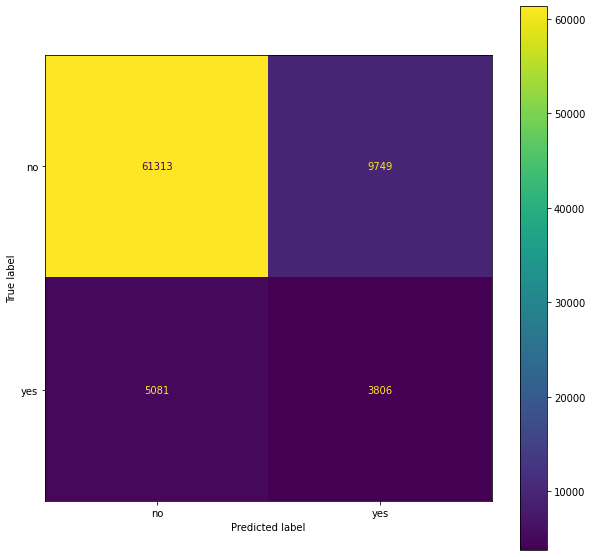

In [103]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "naive_bayes")